# DL Techniques for DDOS Anomaly detection in SDN 

In [13]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
from matplotlib.pyplot import figure
import seaborn as sns
import time
import os

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, MaxAbsScaler, LabelEncoder, OneHotEncoder, PowerTransformer
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, RepeatedKFold, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import pylab
from scipy.stats import skew



#Ensemble Technique
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

##Nueral Network

# Dataset

In [14]:
import pandas as pd 

In [15]:
train_df = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\MOHAMED\dataset_sdn.csv" )
train_df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [16]:
train_df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [17]:
train_df.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,3,15099,14693,1,1.0,2.0,0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [19]:
train_df.describe(include=object)

,src,dst,Protocol
count,104345,104345,104345
unique,19,18,3
top,10.0.0.3,10.0.0.7,ICMP
freq,11491,18020,41321


# Attribute

In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_cat]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_cat: {len(cat_but_cat)}')
#     print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_cat


cat_cols, num_cols, cat_but_cat, = grab_col_names(train_df)
cat_cols, num_cols, cat_but_cat

Observations: 104345
Variables: 23
cat_cols: 6
num_cols: 17
cat_but_cat: 0


(['src', 'dst', 'Protocol', 'Pairflow', 'port_no', 'label'],
 ['dt',
  'switch',
  'pktcount',
  'bytecount',
  'dur',
  'dur_nsec',
  'tot_dur',
  'flows',
  'packetins',
  'pktperflow',
  'byteperflow',
  'pktrate',
  'tx_bytes',
  'rx_bytes',
  'tx_kbps',
  'rx_kbps',
  'tot_kbps'],
 [])

In [21]:
for i in cat_cols:
    print(i, train_df[i].unique())

src ['10.0.0.1' '10.0.0.2' '10.0.0.4' '10.0.0.10' '10.0.0.3' '10.0.0.5'
 '10.0.0.13' '10.0.0.6' '10.0.0.20' '10.0.0.11' '10.0.0.12' '10.0.0.18'
 '10.0.0.8' '10.0.0.7' '10.0.0.9' '10.0.0.14' '10.0.0.15' '10.0.0.16'
 '10.0.0.17']
dst ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']
Protocol ['UDP' 'TCP' 'ICMP']
Pairflow [0 1]
port_no [3 4 1 2 5]
label [0 1]


# Missing values

In [22]:
train_df.isnull()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104341,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104342,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104343,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
train_df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [24]:
train_df["rx_kbps"].fillna(train_df["rx_kbps"].mean())
train_df["tot_kbps"].fillna(train_df["tot_kbps"].mean())

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
104340    2.0
104341    2.0
104342    0.0
104343    2.0
104344    2.0
Name: tot_kbps, Length: 104345, dtype: float64

In [25]:
train_df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

# EDA

## Categorical data

             src      Ratio
src                        
10.0.0.3   11491  11.012507
10.0.0.7   10313   9.883559
10.0.0.10   9671   9.268293
10.0.0.1    8645   8.285016
10.0.0.12   8147   7.807753
10.0.0.2    8063   7.727251
10.0.0.5    7291   6.987398
10.0.0.9    7209   6.908812
10.0.0.11   6455   6.186209
10.0.0.4    5999   5.749197
10.0.0.8    5241   5.022761
10.0.0.6    2740   2.625904
10.0.0.18   2590   2.482151
10.0.0.13   2484   2.380564
10.0.0.14   2265   2.170684
10.0.0.15   1858   1.780632
10.0.0.16   1789   1.714505
10.0.0.20   1114   1.067612
10.0.0.17    980   0.939192


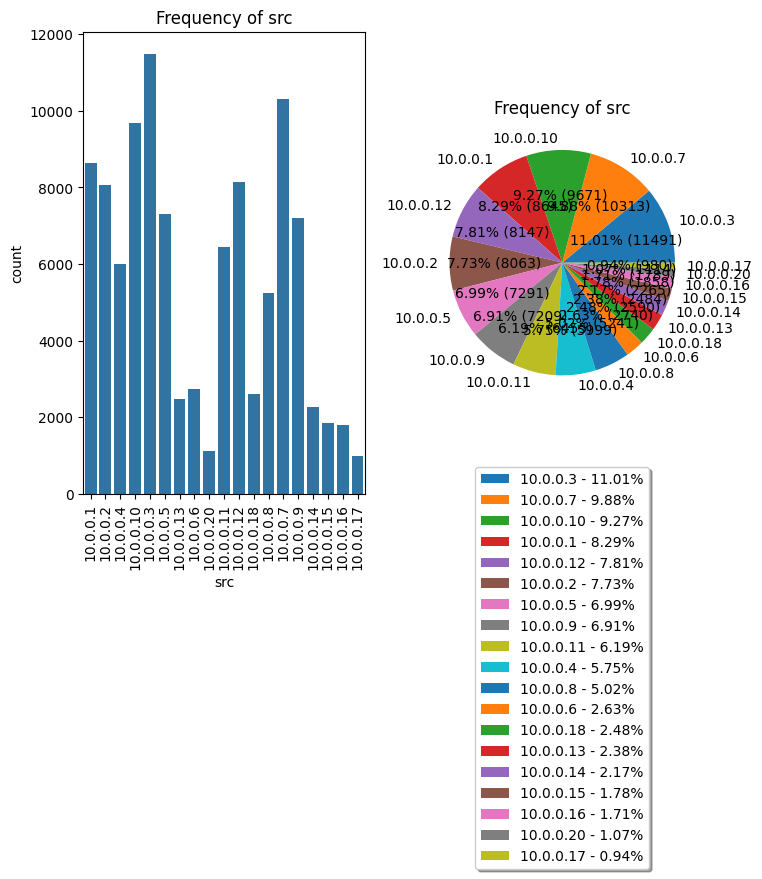

             dst      Ratio
dst                        
10.0.0.7   18020  17.269634
10.0.0.8   15587  14.937946
10.0.0.5   15184  14.551727
10.0.0.3   13051  12.507547
10.0.0.9    6318   6.054914
10.0.0.12   5635   5.400355
10.0.0.2    4990   4.782213
10.0.0.1    4645   4.451579
10.0.0.4    3963   3.797978
10.0.0.10   3926   3.762519
10.0.0.11   3370   3.229671
10.0.0.14   2007   1.923427
10.0.0.15   1765   1.691504
10.0.0.16   1684   1.613877
10.0.0.6    1590   1.523791
10.0.0.13   1076   1.031195
10.0.0.18    790   0.757104
10.0.0.17    744   0.713019


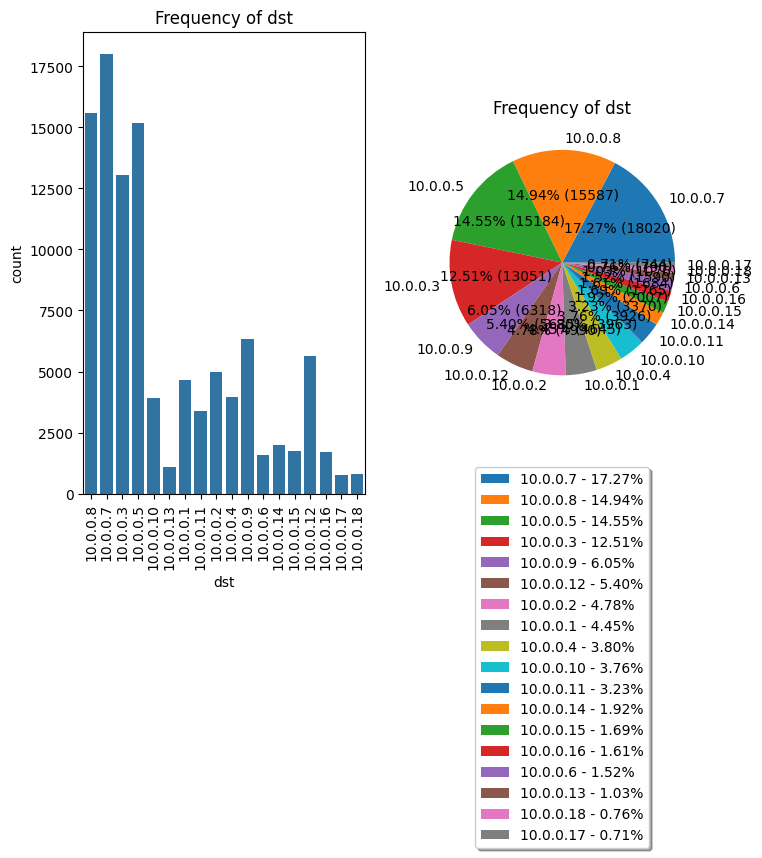

          Protocol      Ratio
Protocol                     
ICMP         41321  39.600364
UDP          33588  32.189372
TCP          29436  28.210264


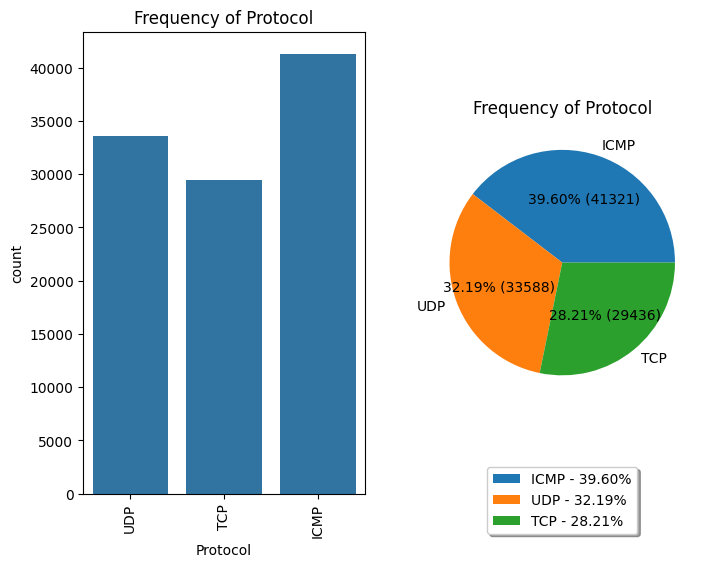

          Pairflow      Ratio
Pairflow                     
1            62710  60.098711
0            41635  39.901289


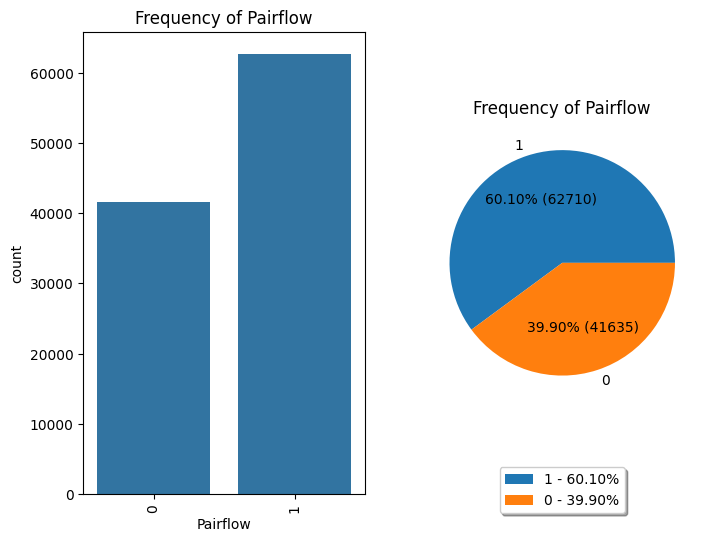

         port_no      Ratio
port_no                    
1          29645  28.410561
2          29148  27.934257
3          28413  27.229862
4          15637  14.985864
5           1502   1.439456


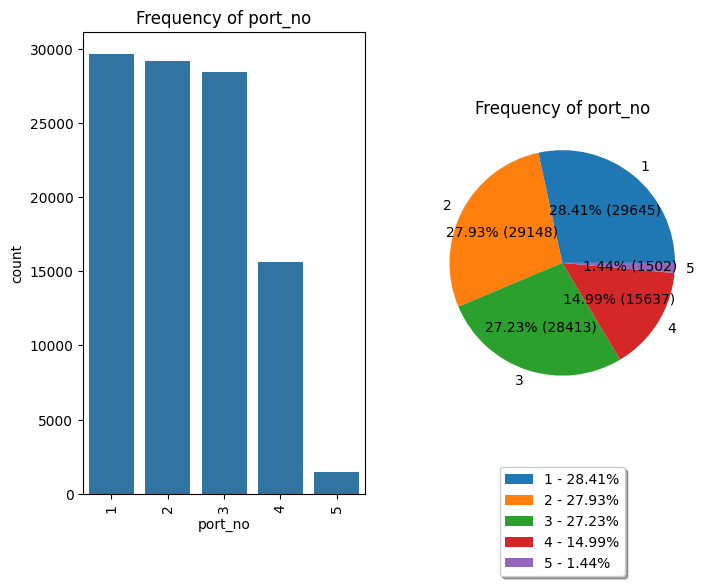

       label      Ratio
label                  
0      63561  60.914275
1      40784  39.085725


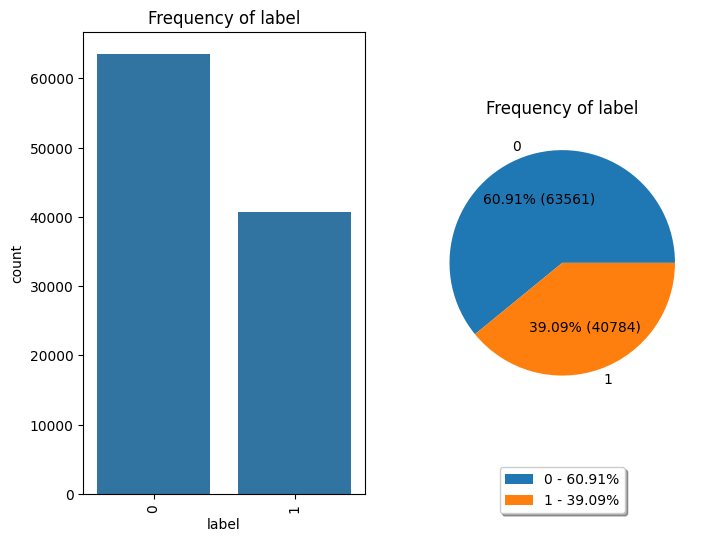

In [26]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(train_df, col, True)

## Numerical Data

In [27]:
# Distribution Plots:
def my_histplot(df, col, ax):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
def my_kdeplot(df, col, ax):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'KDE Plot of {col}')

# Relational Plots:
def my_scatterplot(df, col, ax):
    sns.scatterplot(df[col], ax=ax)
    ax.set_title(f'Scatter Plot of {col}')
def my_lineplot(df, col, ax):
    sns.lineplot(df[col], ax=ax)
    ax.set_title(f'Line Plot of {col}')
    
# Categorical Plots:
def my_pie_chart(df, col, ax):
    labels = df[col].value_counts()
    ax.pie(labels, labels=labels.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {col}')
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
def my_boxplot(df, col, ax):
    sns.boxplot(y=df[col], ax=ax)
def my_violinplot(df, col, ax):
    sns.violinplot(y=df[col], ax=ax)
    
# Matrix Plots:
def my_heatmap(df, size):
    if size: plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()
    
#vsplot
def my_vsplot(df, normal_col, label_col):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.bar(list(dict(df[normal_col].value_counts()).keys()), dict(df[normal_col].value_counts()).values(), color='r')
    plt.bar(list(dict(df[normal_col][df[label_col] == 1].value_counts()).keys()), dict(df[normal_col][df[label_col] == 1].value_counts()).values(), color='b')

    plt.xlabel(normal_col)
    plt.ylabel('Count')
    plt.legend(['All', label_col])
    # plt.title('The number of requests from different protocols')
    
def plot_charts_grid_single_feature(df, plot_func, size=(12, 4), n_col=1):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, label in enumerate(df.columns):
        plot_func(df, label, axes[i])
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# mean_value = df_train["Age"].mean()
# median_value = df_train["Age"].median()

# plt.axvline(mean_value, color='#5C469C', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
# plt.axvline(median_value, color='#D4ADFC', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

C:\Users\moham\AppData\Local\Temp\ipykernel_22196\3399835900.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\moham\AppData\Local\Temp\ipykernel_22196\3399835900.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\moham\AppData\Local\Temp\ipyk

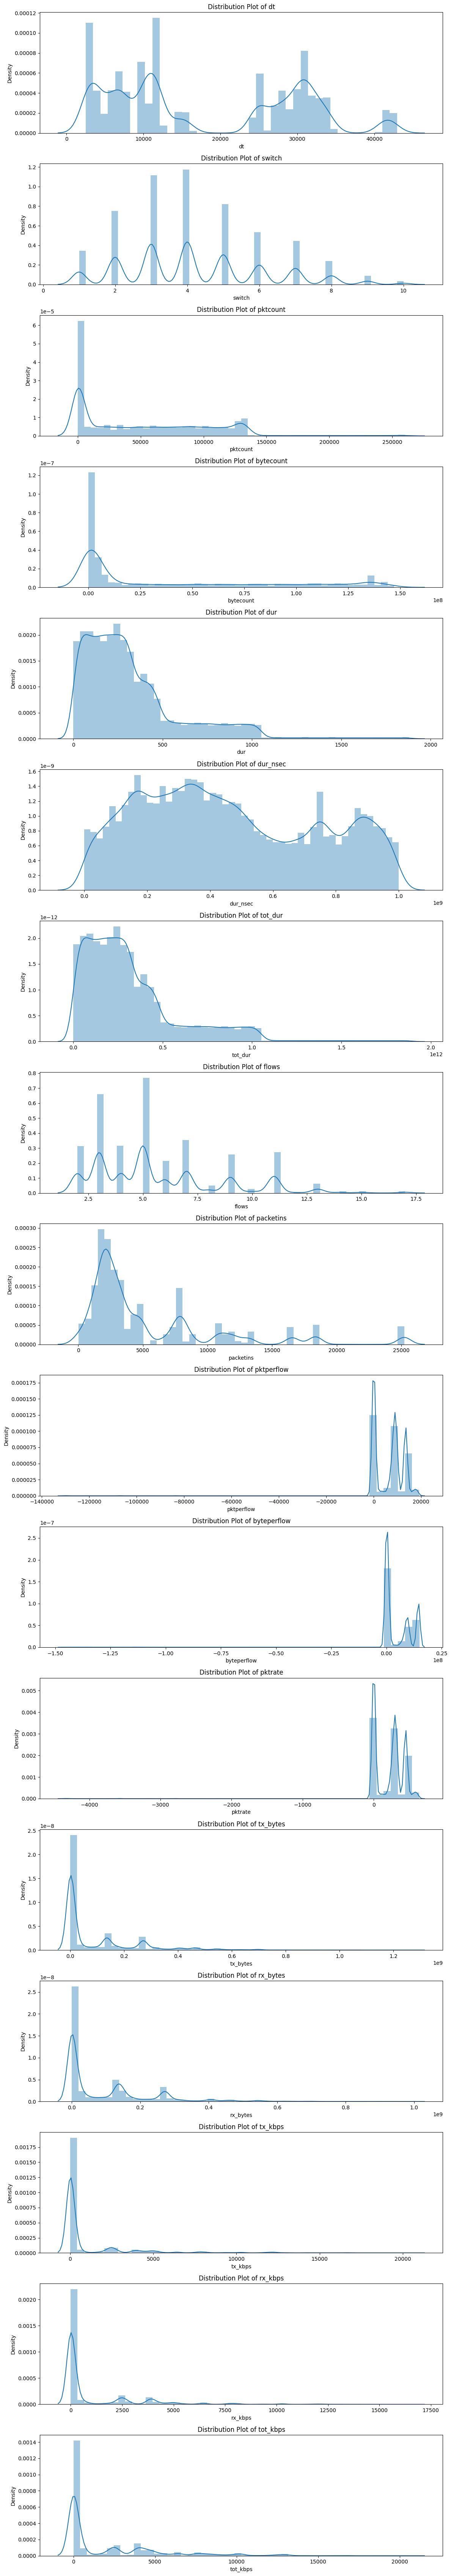

In [28]:
plot_charts_grid_single_feature(train_df[num_cols], my_distplot)

## Box plot

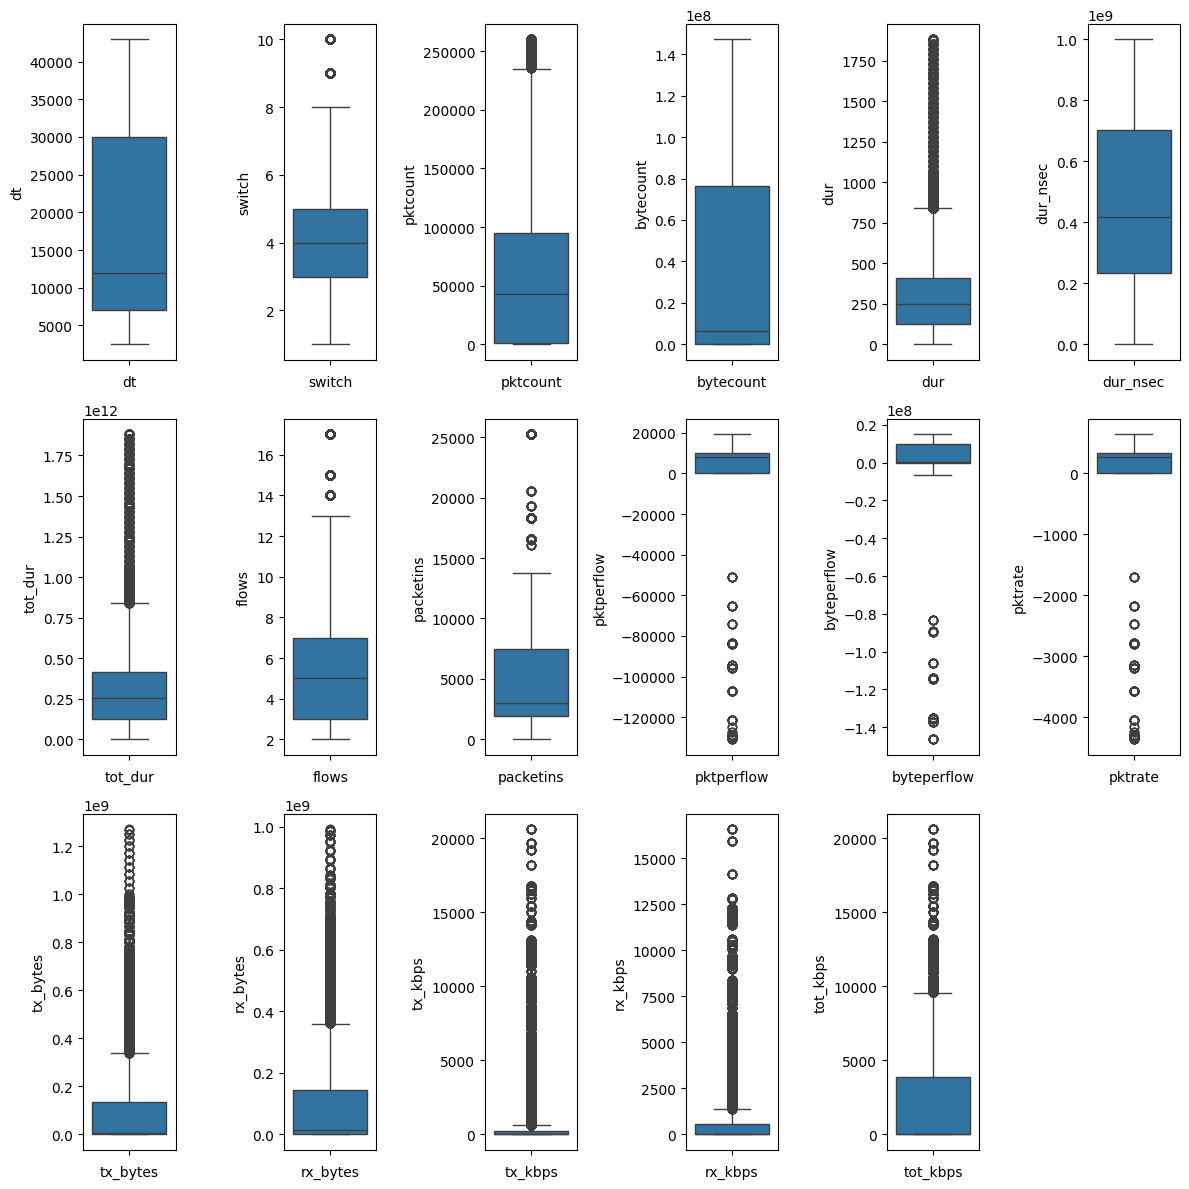

In [29]:
plot_charts_grid_single_feature(train_df[num_cols], my_boxplot, size=(2, 4), n_col=6)

## Corelation

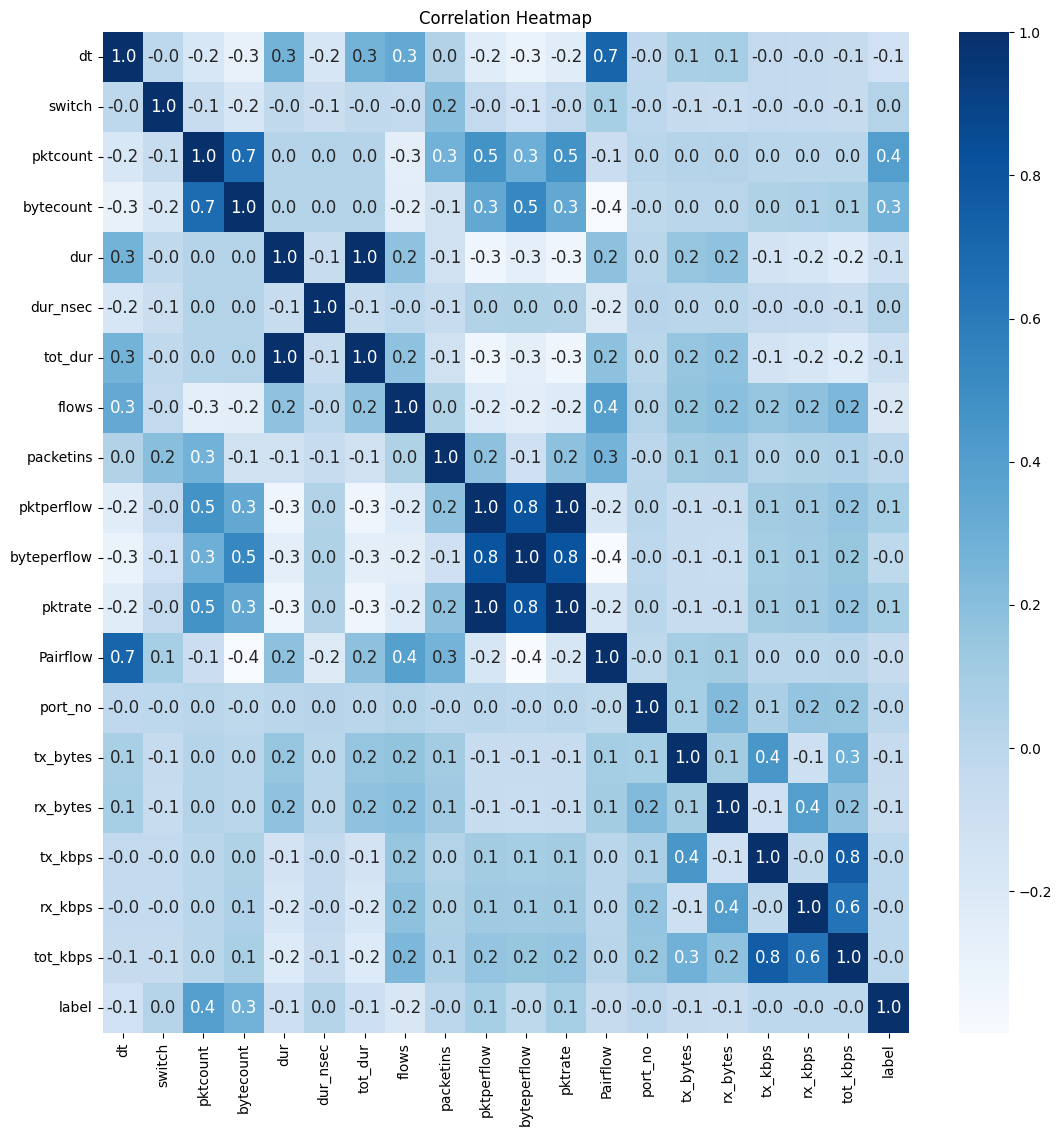

In [30]:
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
my_heatmap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

# Feature Engg

In [31]:
train_df['switch'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [32]:
cat_cols, num_cols, cat_but_cat

(['src', 'dst', 'Protocol', 'Pairflow', 'port_no', 'label'],
 ['dt',
  'switch',
  'pktcount',
  'bytecount',
  'dur',
  'dur_nsec',
  'tot_dur',
  'flows',
  'packetins',
  'pktperflow',
  'byteperflow',
  'pktrate',
  'tx_bytes',
  'rx_bytes',
  'tx_kbps',
  'rx_kbps',
  'tot_kbps'],
 [])

In [33]:
remove_cols = ["dt", "tx_kbps", "pktperflow", "pktrate"]

In [34]:
train_df.drop(remove_cols, axis=1, inplace=True)

In [35]:
train_df.columns

Index(['switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec',
       'tot_dur', 'flows', 'packetins', 'byteperflow', 'Pairflow', 'Protocol',
       'port_no', 'tx_bytes', 'rx_bytes', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

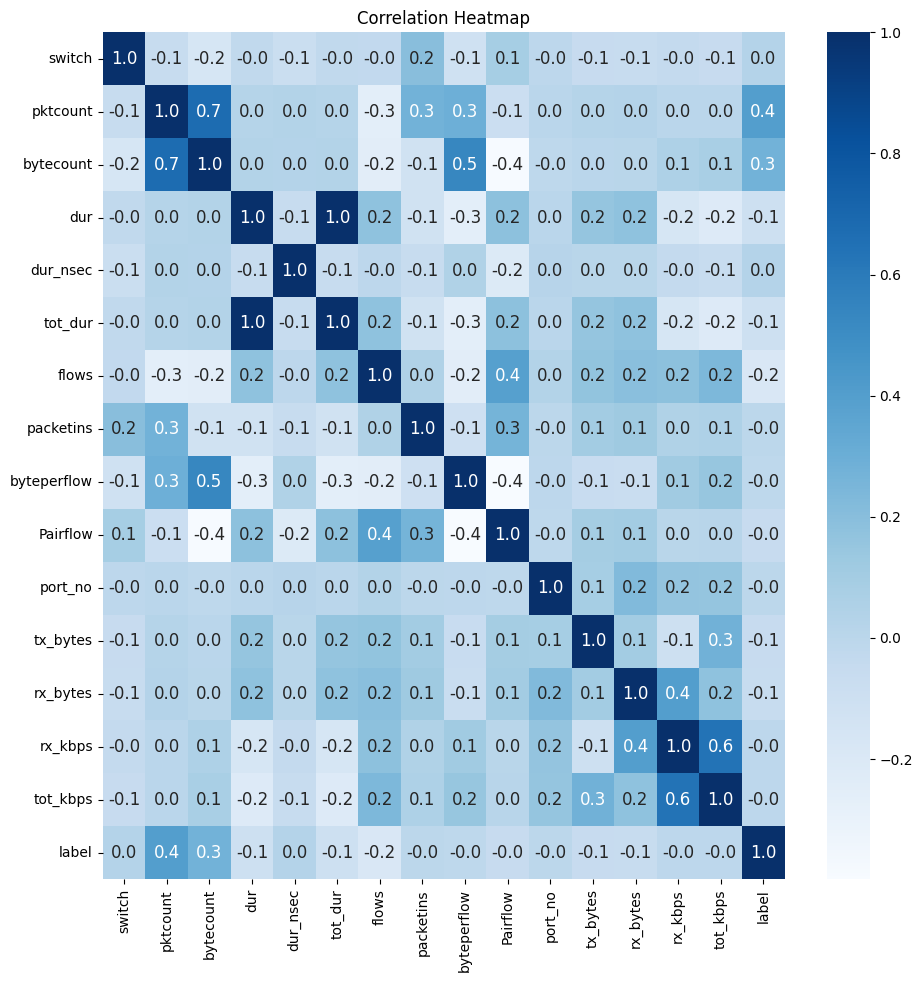

In [36]:
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
my_heatmap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

## Feature selection

## Feature Transformation

In [37]:
train_df = train_df.apply(LabelEncoder().fit_transform)

In [38]:
train_df.head()

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,byteperflow,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,rx_kbps,tot_kbps,label
0,0,0,16,3176,6960,100,716,3447,1,54,2349,0,2,2,8607,326,0,0,0
1,0,0,16,7844,8943,280,734,3627,0,54,2345,0,2,3,222,265,0,0,0
2,0,10,16,5777,8052,200,744,3547,1,54,2348,0,2,0,207,22,0,0,0
3,0,10,16,5777,8052,200,744,3547,1,54,2348,0,2,1,161,50,0,0,0
4,0,10,16,5777,8052,200,744,3547,1,54,2348,0,2,2,86,287,0,0,0


# Models

In [39]:
X = train_df.drop(columns='label')
y = train_df['label']

In [40]:
X.head()

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,byteperflow,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,rx_kbps,tot_kbps
0,0,0,16,3176,6960,100,716,3447,1,54,2349,0,2,2,8607,326,0,0
1,0,0,16,7844,8943,280,734,3627,0,54,2345,0,2,3,222,265,0,0
2,0,10,16,5777,8052,200,744,3547,1,54,2348,0,2,0,207,22,0,0
3,0,10,16,5777,8052,200,744,3547,1,54,2348,0,2,1,161,50,0,0
4,0,10,16,5777,8052,200,744,3547,1,54,2348,0,2,2,86,287,0,0


In [41]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
classification_evals = {}

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(np.array(X_train)))
    test_accuracy = accuracy_score(y_test, model.predict(np.array(X_test)))
    # val_accuracy = accuracy_score(y_val, model.predict(np.array(X_test)))
    train_precision = precision_score(y_train, model.predict(np.array(X_train)))
    test_precision = precision_score(y_test, model.predict(np.array(X_test)))
    train_recall = recall_score(y_train, model.predict(np.array(X_train)))
    test_recall = recall_score(y_test, model.predict(np.array(X_test)))

    classification_evals[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall
    }

    print("Training Accuracy " + str(name) + ": {:.2f}".format(train_accuracy * 100))
    print("Test Accuracy " + str(name) + ": {:.2f}".format(test_accuracy * 100))
    print("Training Precision " + str(name) + ": {:.2f}".format(train_precision * 100))
    print("Test Precision " + str(name) + ": {:.2f}".format(test_precision * 100))
    print("Training Recall " + str(name) + ": {:.2f}".format(train_recall * 100))
    print("Test Recall " + str(name) + ": {:.2f}".format(test_recall * 100))

    # Plot the confusion matrix
    actual = y_test
    predicted = model.predict(np.array(X_test))
    cm = confusion_matrix(actual, predicted)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.grid(False)
    cm_display.plot(ax=ax)


## Random Forest

In [ ]:
## Random Forest

rf_params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

skf = RepeatedStratifiedKFold(n_splits=5)

RF = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_distributions=rf_params, cv=skf, n_iter=2, n_jobs=2)
                            
RF_model = RF.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)
accuracy_score(y_test, RF_pred)

Training Accuracy Random Forest: 100.00
Test Accuracy Random Forest: 99.98
Training Precision Random Forest: 100.00
Test Precision Random Forest: 99.95
Training Recall Random Forest: 100.00
Test Recall Random Forest: 99.99


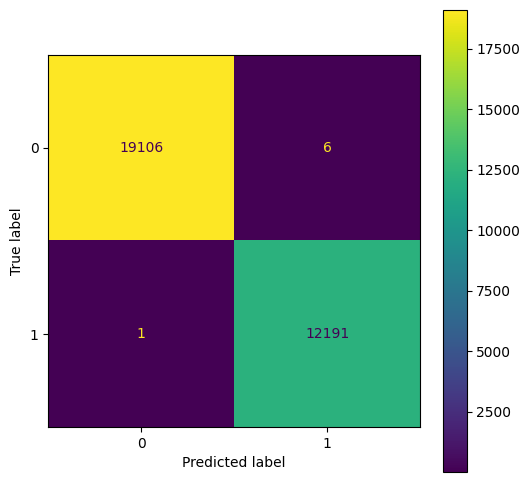

In [ ]:
evaluate_classification(RF_model, "Random Forest", X_train, X_test, y_train, y_test)

## XgBoost

In [ ]:
## XGBoost

xgb_params = {
#     'objective': 'multiclass', # Adjust for your problem type (classification or regression)
    'n_estimators': [100, 200, 300], # Number of boosting rounds
    'learning_rate': [0.1], # Learning rate (controls step size)
    'max_depth': [None,5, 10, 20, 30], # Maximum depth of individual trees
    'min_child_weight': [1], # Minimum sum of hessian for child nodes
    'gamma': [0, 0.5, 1, 1.5, 2, 5], # Minimum loss reduction required for a split
    'subsample': [0.6, 0.8, 1.0], # Fraction of samples for each boosting round
    'colsample_bytree': [0.6, 0.8, 1.0], # Fraction of features considered per tree
    'colsample_bylevel': [1], # Fraction of features considered per level
    'reg_alpha': [1], # L1 regularization term
    'reg_lambda': [0], # L2 regularization term
}

skf = RepeatedStratifiedKFold(n_splits=3)

xgb = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),
                              param_distributions=xgb_params, cv=skf, n_iter=5, n_jobs=4, verbose=-1)
                    
xgb_model = xgb.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.9998083312036801

Training Accuracy XgBoost: 99.99
Test Accuracy XgBoost: 99.98
Training Precision XgBoost: 99.99
Test Precision XgBoost: 99.95
Training Recall XgBoost: 100.00
Test Recall XgBoost: 100.00


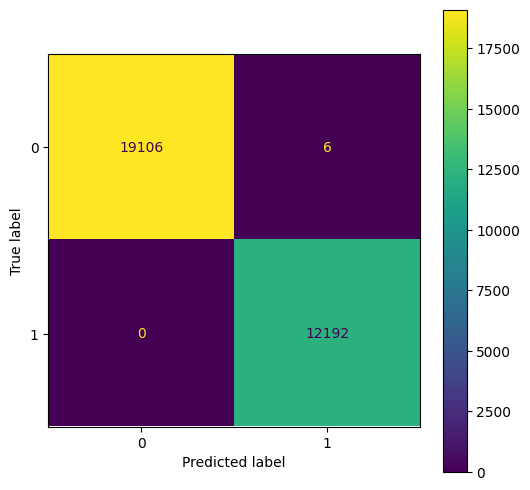

In [ ]:
evaluate_classification(xgb_model, "XgBoost", X_train, X_test, y_train, y_test)

## LGBM

In [ ]:
lgbm_params = {
        'num_leaves': [100, 200, 300], 
        'learning_rate': [0.01, 0.02], 
        'n_estimators': [100, 200, 300],
        'lambda_l1': [1e-07, 2e-07, 10e-07],
        'lambda_l2': [0.1063299210212167, 0.2063299210212167, 0.5063299210212167], 
        'max_depth': [5, 10, 20],
    }

skf = RepeatedStratifiedKFold(n_splits=5)

lgbm = RandomizedSearchCV(estimator=LGBMClassifier(random_state=42, verbosity=-1),
                              param_distributions=lgbm_params, cv=skf, n_iter=5, n_jobs=3, verbose=-1)
                      
lgbm_model = lgbm.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, lgbm_pred)

0.9990736008177868

Training Accuracy LGBM: 99.96
Test Accuracy LGBM: 99.91
Training Precision LGBM: 99.95
Test Precision LGBM: 99.79
Training Recall LGBM: 99.94
Test Recall LGBM: 99.98


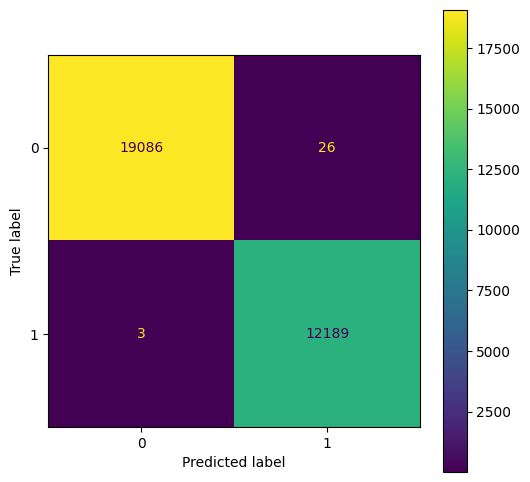

In [ ]:
evaluate_classification(lgbm_model, "LGBM", X_train, X_test, y_train, y_test)

## Catboosting

In [ ]:
# CatBoost parameters
catboost_params = {
    'iterations': [300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [0.1, 1, 5],
    'subsample': [0.7, 0.8, 0.9],
    'border_count': [32, 64, 128],
    'min_data_in_leaf': [50, 75, 100],
    'random_strength': [1e-9, 1e-8, 1e-7],
    'colsample_bylevel': [0.8, 0.9, 1.0],
}


# Stratified K-Folds
skf = RepeatedStratifiedKFold(n_splits=5)

# CatBoost classifier with RandomizedSearchCV
# catboost = RandomizedSearchCV(
#     estimator=CatBoostClassifier(random_state=42, verbose=False),
#     param_distributions=catboost_params, 
#     cv=skf, n_jobs=3, verbose=-1
# )

catboost = CatBoostClassifier(random_state=42, verbose=False)

# Train the model
catboost_model = catboost.fit(X_train, y_train)

# Predict
catboost_pred = catboost_model.predict(X_test)

# Calculate accuracy
print(accuracy_score(y_test, catboost_pred))

0.9998083312036801


Training Accuracy Catboost: 100.00
Test Accuracy Catboost: 99.98
Training Precision Catboost: 99.99
Test Precision Catboost: 99.95
Training Recall Catboost: 100.00
Test Recall Catboost: 100.00


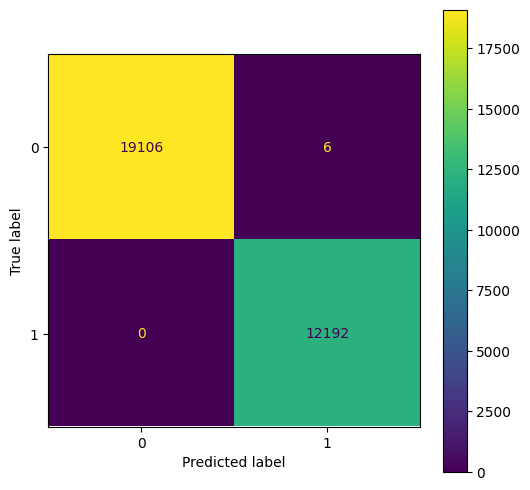

In [ ]:
evaluate_classification(catboost_model, "Catboost", X_train, X_test, y_train, y_test)